# Temat testów
### Czy istnieje istotna statystycznie różnica w czasie odpowiedzi w zależności od trudności zadania? 

In [1]:
import pandas as pd

from functions.set_preparations import prepare_row
from functions.tests.categorical_and_quntitative import conduct_categorical_vs_quantitative_continue_test
from functions.plots import plot_multi_boxplot, plot_multi_density

In [2]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

df_merge = df_answers.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,SumTime_all,SumTime_a,SumTime_b,SumTime_1,SumTime_2,SumTime_3
0,1,3,1,4,3,4,4,19,4,1,...,54481,58697,56314,63897,276921,138810,138110,43531,113178,120211
1,2,1,2,3,1,2,4,13,5,1,...,42248,85329,47948,129427,459647,156426,303219,154693,127577,177375
2,3,2,1,3,1,1,1,9,4,1,...,45165,32732,8000,61197,299890,121995,177892,152793,77897,69197
3,4,3,2,2,1,3,5,16,5,1,...,12449,37715,60980,101795,337437,119477,217956,124494,50164,162775
4,5,4,2,3,2,3,3,17,6,1,...,55931,22132,34898,62930,271458,158809,112644,95562,78063,97828


In [4]:
# Utworzenie kolekcji:
# wszystkie grafiki
conf = prepare_row(df_answers.filter(regex='.*_trud$'))
time = prepare_row(df_merge.filter(regex='Duration'))
df_collAll = pd.DataFrame({'difficulty': conf, 'time': time})

# grafiki A
conf = prepare_row(df_answers.filter(regex='.*a_trud$'))
time = prepare_row(df_merge.filter(regex='Duration_.*a'))
df_collA = pd.DataFrame({'difficulty': conf, 'time': time})

# grafiki B
conf = prepare_row(df_answers.filter(regex='.*b_trud$'))
time = prepare_row(df_merge.filter(regex='Duration_.*b'))
df_collB = pd.DataFrame({'difficulty': conf, 'time': time})

# grafiki 1
conf = prepare_row(df_answers.filter(regex='1.*_trud$'))
time = prepare_row(df_merge.filter(regex='Duration_1'))
df_coll1 = pd.DataFrame({'difficulty': conf, 'time': time})

# grafiki 2
conf = prepare_row(df_answers.filter(regex='2.*_trud$'))
time = prepare_row(df_merge.filter(regex='Duration_2'))
df_coll2 = pd.DataFrame({'difficulty': conf, 'time': time})

# grafiki 3
conf = prepare_row(df_answers.filter(regex='3.*_trud$'))
time = prepare_row(df_merge.filter(regex='Duration_3'))
df_coll3 = pd.DataFrame({'difficulty': conf, 'time': time})

**H0:** Nie ma istotnej statystycznie zależności między czasem odpowiedzi a trudnością zadania.

**H1:** Istnieje istotna statystycznie zależność między czasem odpowiedzi a trudnością zadania.

**Poziom istotności:** $\alpha=0.05$

In [5]:
ALPHA = 0.05

#### Testy dla zsumowanych grafik

Kruskal-Wallis test conducted...
H: 8.966463414634177
p-value: 0.7057922096544922
Brak podstaw do odrzucenia H0.


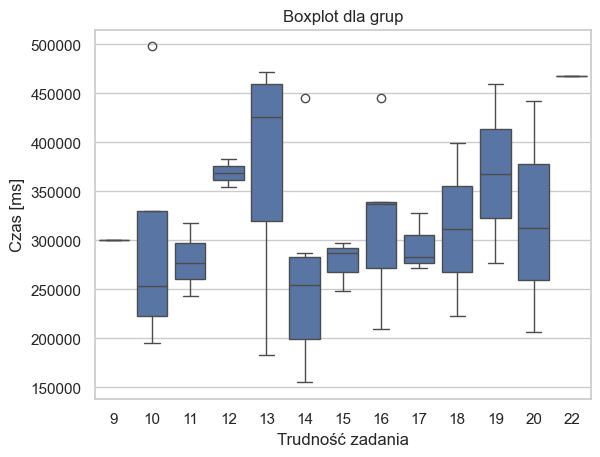

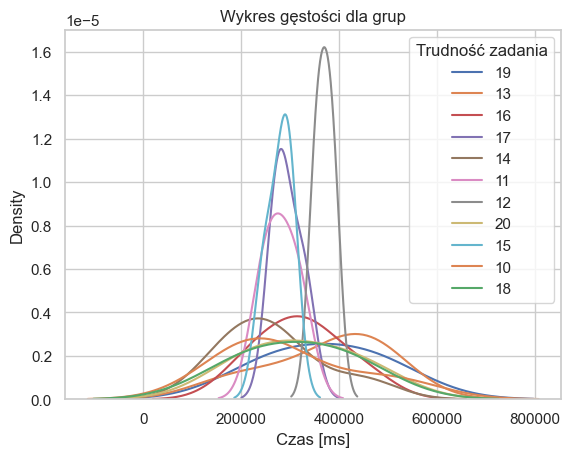

In [6]:
# wszystkie grafiki
conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_all', 'Trud_all', ALPHA)
plot_multi_boxplot(df_merge, 'Trud_all', 'SumTime_all', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_all', 'Trud_all', 'Czas [ms]', 'Trudność zadania')

Kruskal-Wallis test conducted...
H: 9.318292682926824
p-value: 0.23060448012269388
Brak podstaw do odrzucenia H0.


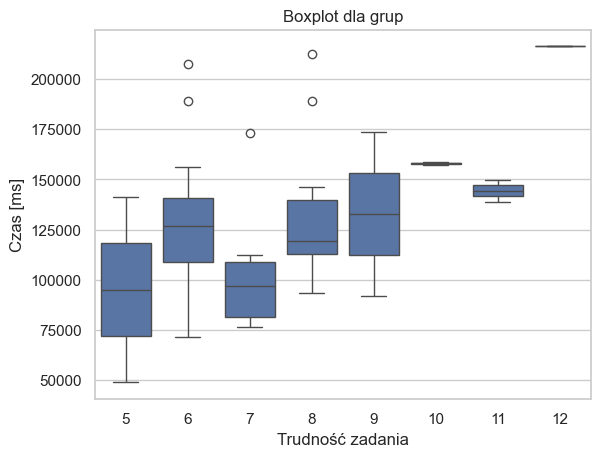

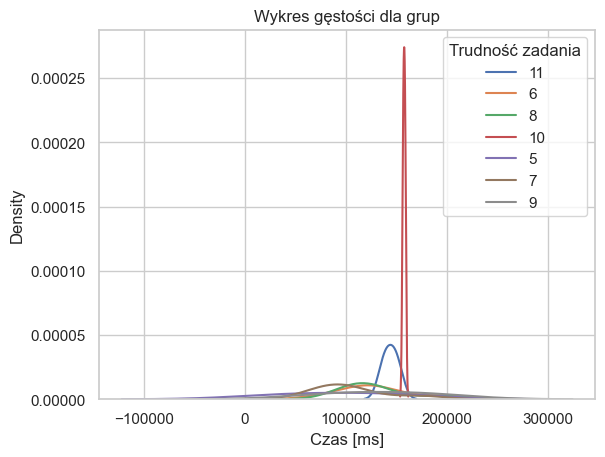

In [7]:
# grafiki A
conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_a', 'SumTrud_a', ALPHA)
plot_multi_boxplot(df_merge, 'SumTrud_a', 'SumTime_a', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_a', 'SumTrud_a', 'Czas [ms]', 'Trudność zadania')

Kruskal-Wallis test conducted...
H: 11.464634146341496
p-value: 0.2451992199507065
Brak podstaw do odrzucenia H0.


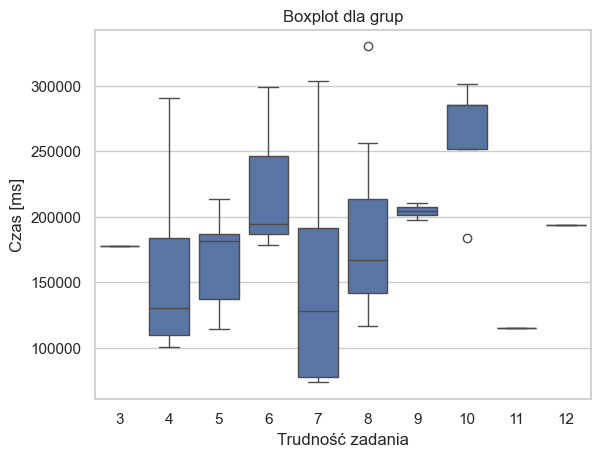

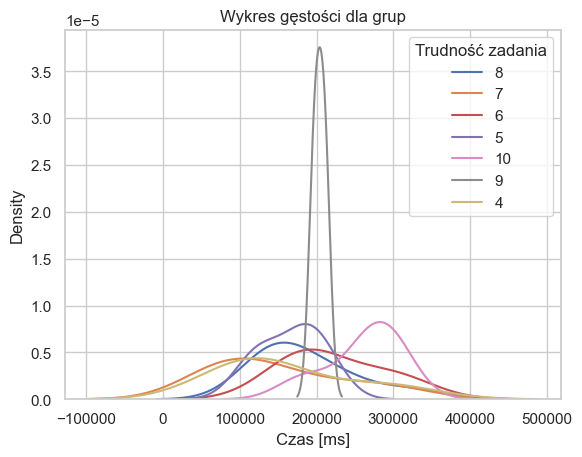

In [8]:
# grafiki B
conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_b', 'SumTrud_b', ALPHA)
plot_multi_boxplot(df_merge, 'SumTrud_b', 'SumTime_b', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_b', 'SumTrud_b', 'Czas [ms]', 'Trudność zadania')

Kruskal-Wallis test conducted...
H: 2.637900696864108
p-value: 0.7555986188942464
Brak podstaw do odrzucenia H0.


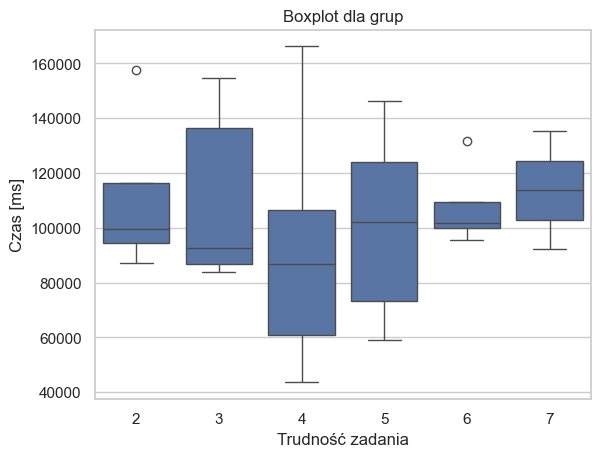

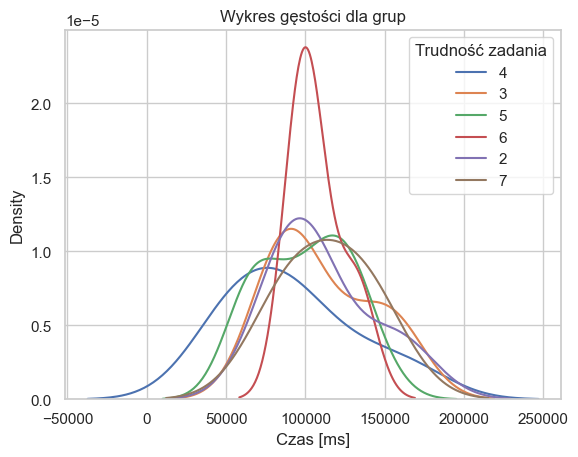

Kruskal-Wallis test conducted...
H: 23.124024390243903
p-value: 0.0007559860069732003
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


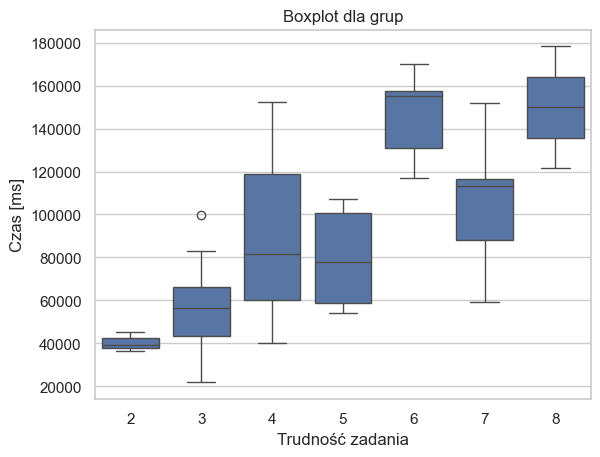

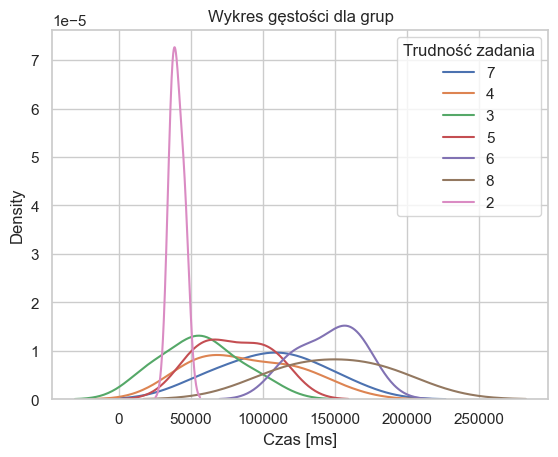

Kruskal-Wallis test conducted...
H: 14.931445993031389
p-value: 0.036888276153954125
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


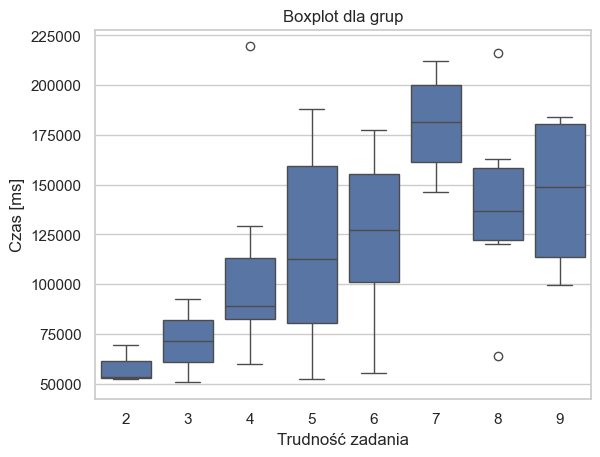

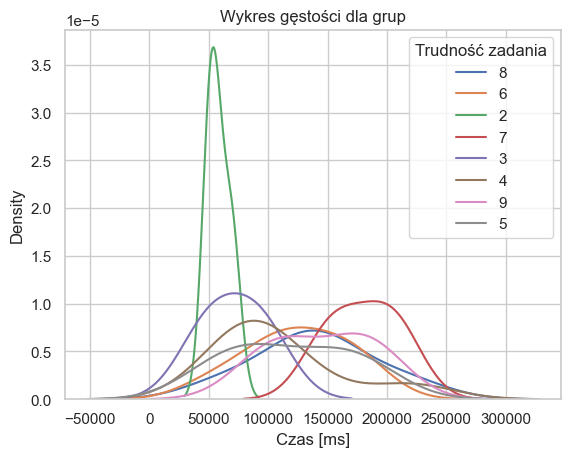

In [9]:
# grafiki 1, 2, 3
conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_1', 'SumTrud_1', ALPHA)
plot_multi_boxplot(df_merge, 'SumTrud_1', 'SumTime_1', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_1', 'SumTrud_1', 'Czas [ms]', 'Trudność zadania')

conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_2', 'SumTrud_2', ALPHA)
plot_multi_boxplot(df_merge, 'SumTrud_2', 'SumTime_2', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_2', 'SumTrud_2', 'Czas [ms]', 'Trudność zadania')

conduct_categorical_vs_quantitative_continue_test(df_merge, 'SumTime_3', 'SumTrud_3', ALPHA)
plot_multi_boxplot(df_merge, 'SumTrud_3', 'SumTime_3', 'Trudność zadania', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_3', 'SumTrud_3', 'Czas [ms]', 'Trudność zadania')

#### Testy dla kolekcji

Conducting normality test...
Kruskal-Wallis test conducted...
H: 55.967632527964874
p-value: 2.036754018702941e-11
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


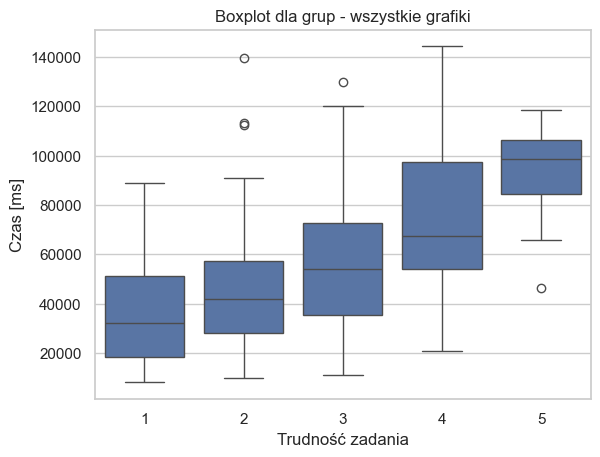

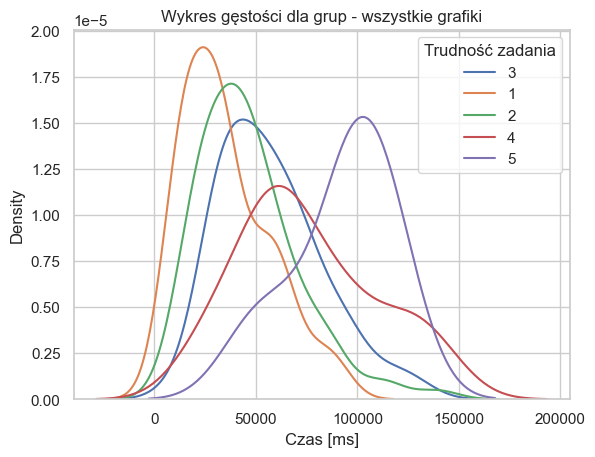

In [14]:
# wszystkie grafiki
conduct_categorical_vs_quantitative_continue_test(df_collAll, 'time', 'difficulty', ALPHA)

plot_multi_boxplot(df_collAll, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - wszystkie grafiki')
plot_multi_density(df_collAll, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - wszystkie grafiki')

Conducting normality test...
Kruskal-Wallis test conducted...
H: 28.581302901540827
p-value: 9.507687981637712e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


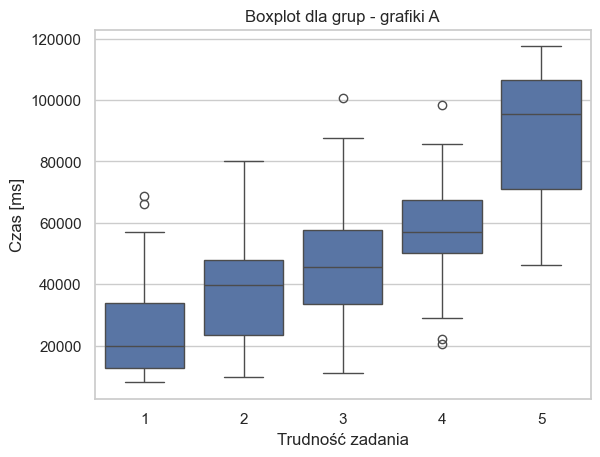

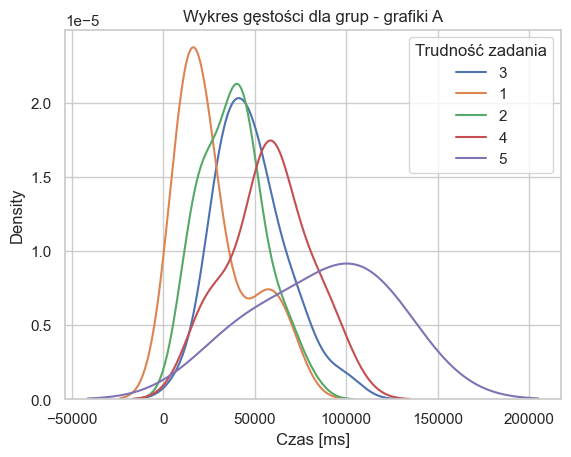

In [15]:
#  grafiki A
conduct_categorical_vs_quantitative_continue_test(df_collA, 'time', 'difficulty', ALPHA)

plot_multi_boxplot(df_collA, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - grafiki A')
plot_multi_density(df_collA, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - grafiki A')

Conducting normality test...
Kruskal-Wallis test conducted...
H: 36.092067445706306
p-value: 2.7702035589249966e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


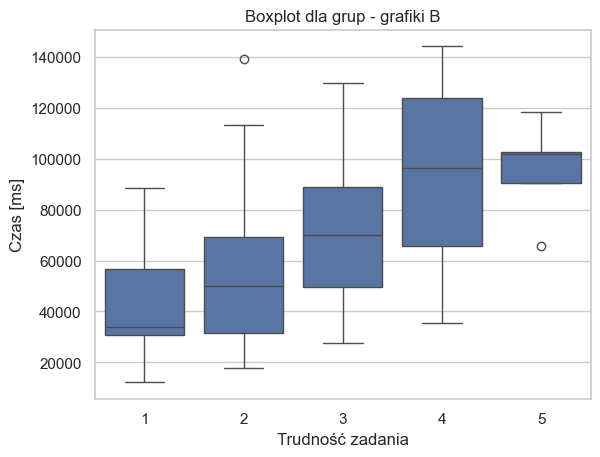

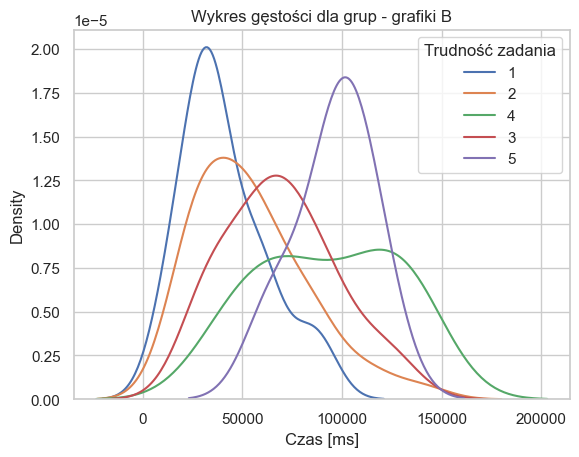

In [16]:
#  grafiki B
conduct_categorical_vs_quantitative_continue_test(df_collB, 'time', 'difficulty', ALPHA)

plot_multi_boxplot(df_collB, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - grafiki B')
plot_multi_density(df_collB, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - grafiki B')

Kruskal-Wallis test conducted...
H: 9.535284591951267
p-value: 0.0490272548941204
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


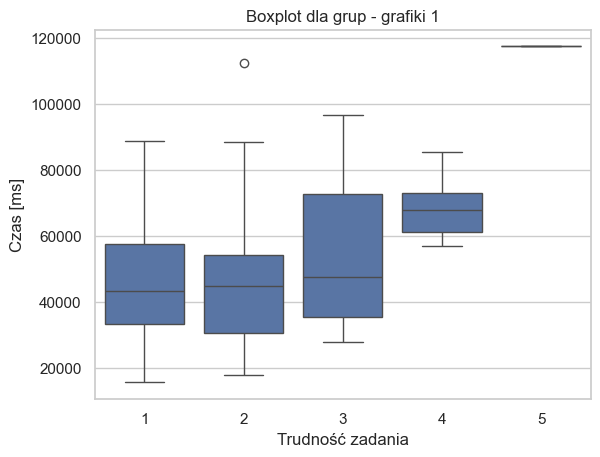

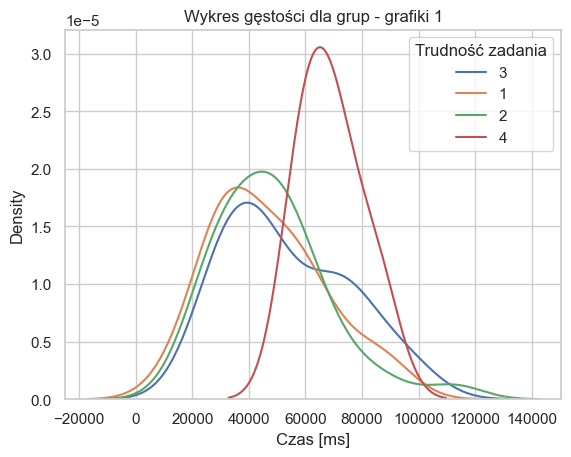

Kruskal-Wallis test conducted...
H: 21.18016593933101
p-value: 0.00029165669378083443
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


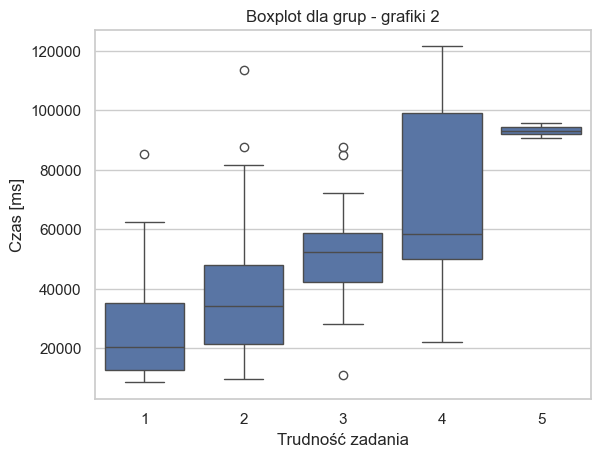

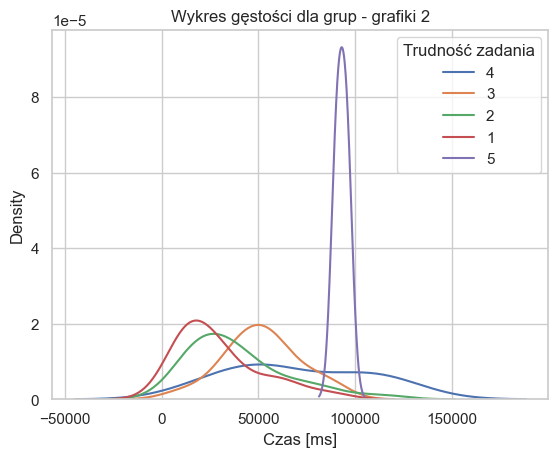

Conducting normality test...
Kruskal-Wallis test conducted...
H: 25.490969093397517
p-value: 4.007434623559969e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


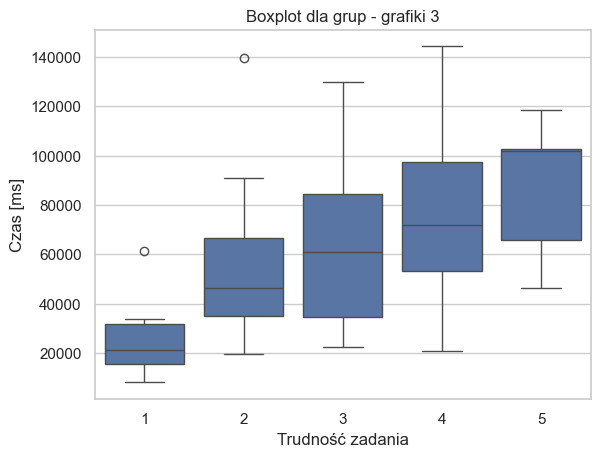

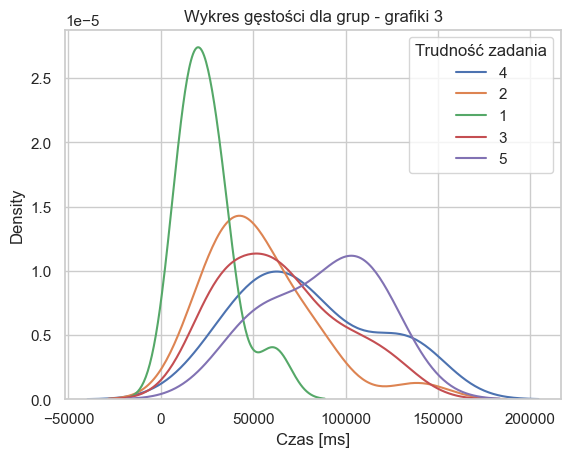

In [17]:
#  grafiki 1, 2, 3
conduct_categorical_vs_quantitative_continue_test(df_coll1, 'time', 'difficulty', ALPHA)
plot_multi_boxplot(df_coll1, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - grafiki 1')
plot_multi_density(df_coll1, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - grafiki 1')

conduct_categorical_vs_quantitative_continue_test(df_coll2, 'time', 'difficulty', ALPHA)
plot_multi_boxplot(df_coll2, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - grafiki 2')
plot_multi_density(df_coll2, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - grafiki 2')

conduct_categorical_vs_quantitative_continue_test(df_coll3, 'time', 'difficulty', ALPHA)
plot_multi_boxplot(df_coll3, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup - grafiki 3')
plot_multi_density(df_coll3, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup - grafiki 3')

#### Testy dla każdej grafiki oddzielnie 1a, 1b, 2a, 2b, 3a, 3b

In [18]:
df1a = pd.DataFrame({'time': df_merge['Duration_1a'], 'difficulty': df_merge['1a_trud']})
df2a = pd.DataFrame({'time': df_merge['Duration_2a'], 'difficulty': df_merge['2a_trud']})
df3a = pd.DataFrame({'time': df_merge['Duration_3a'], 'difficulty': df_merge['3a_trud']})

df1b = pd.DataFrame({'time': df_merge['Duration_1b'], 'difficulty': df_merge['1b_trud']})
df2b = pd.DataFrame({'time': df_merge['Duration_2b'], 'difficulty': df_merge['2b_trud']})
df3b = pd.DataFrame({'time': df_merge['Duration_3b'], 'difficulty': df_merge['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [19]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    conduct_categorical_vs_quantitative_continue_test(df, 'time', 'difficulty', ALPHA)

-------------------------------------
1a:
Kruskal-Wallis test conducted...
H: 8.033623693379809
p-value: 0.09035425169108957
Brak podstaw do odrzucenia H0.
-------------------------------------
1b:
Kruskal-Wallis test conducted...
H: 4.0427062026548555
p-value: 0.25688940452274556
Brak podstaw do odrzucenia H0.
-------------------------------------
2a:
Kruskal-Wallis test conducted...
H: 20.1917516629712
p-value: 0.0004576973780198644
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------------------
2b:
Kruskal-Wallis test conducted...
H: 10.98466898954706
p-value: 0.026736855160072612
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------------------
3a:
Kruskal-Wallis test conducted...
H: 15.184969177164305
p-value: 0.004332560152601039
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------------------
3b:
Conducting normality test...
Conducting homogeneity variance test...
Kruskal-Wallis

-------------------------------------
1a:


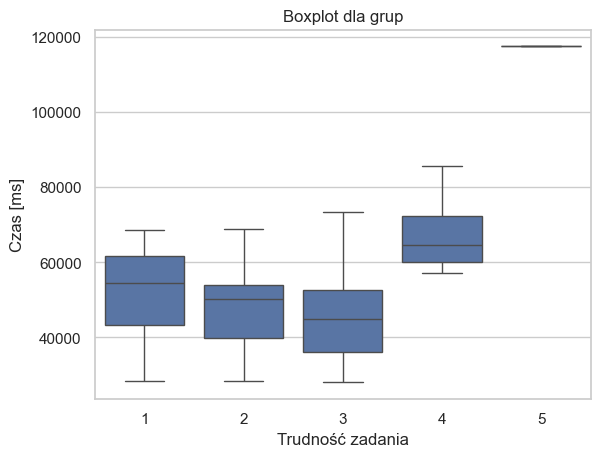

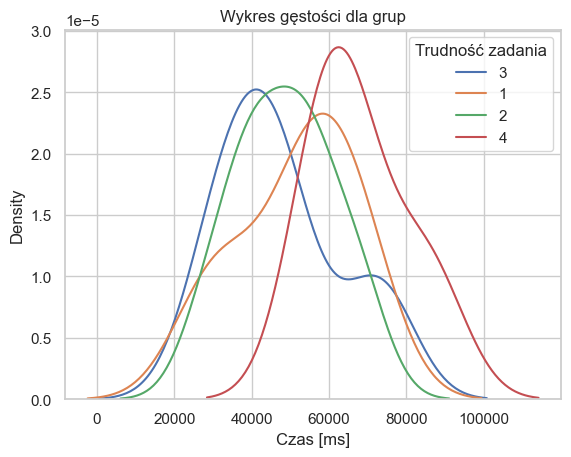

-------------------------------------
1b:


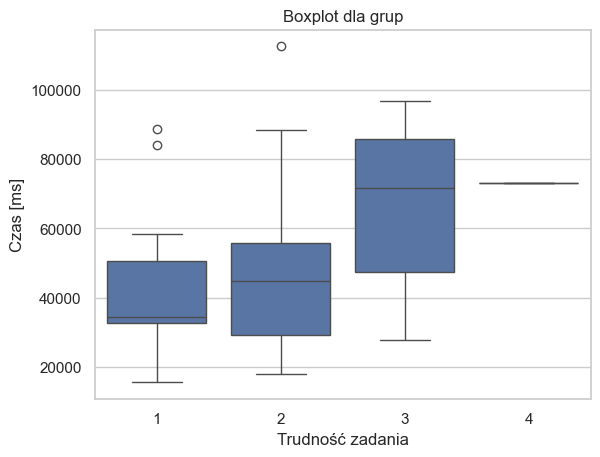

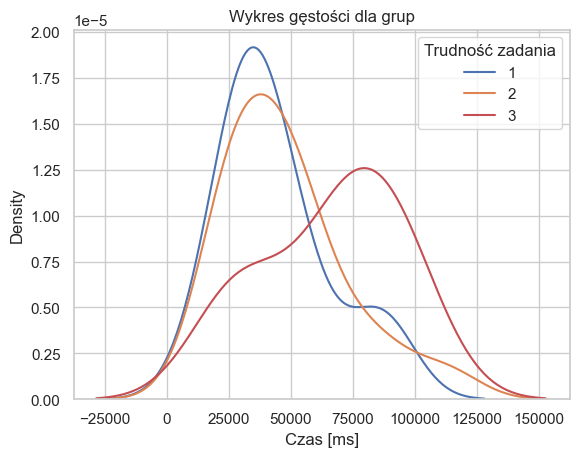

-------------------------------------
2a:


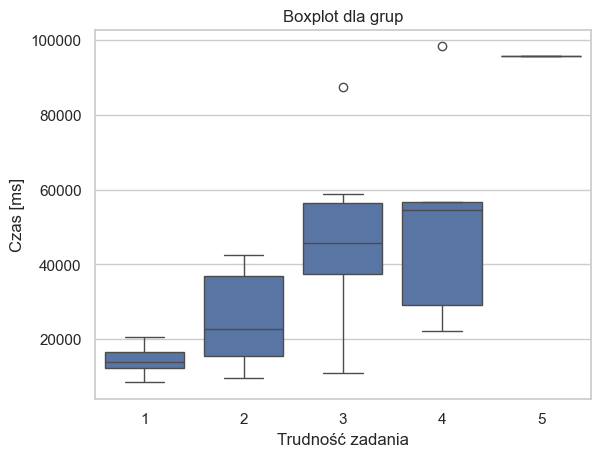

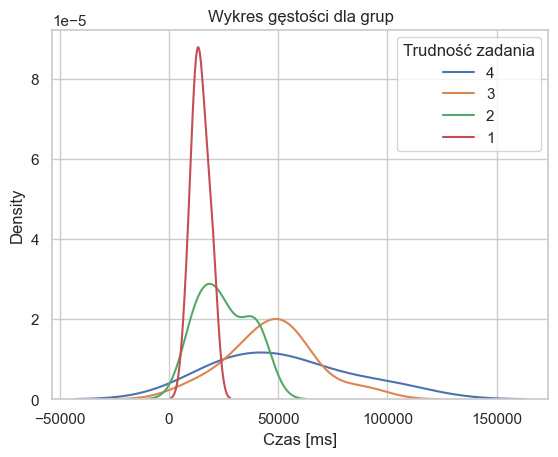

-------------------------------------
2b:


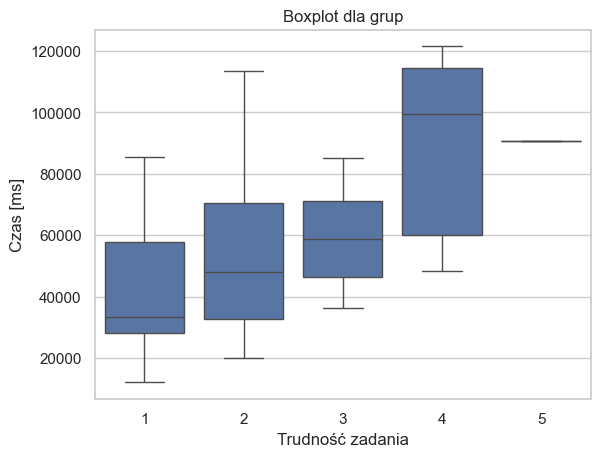

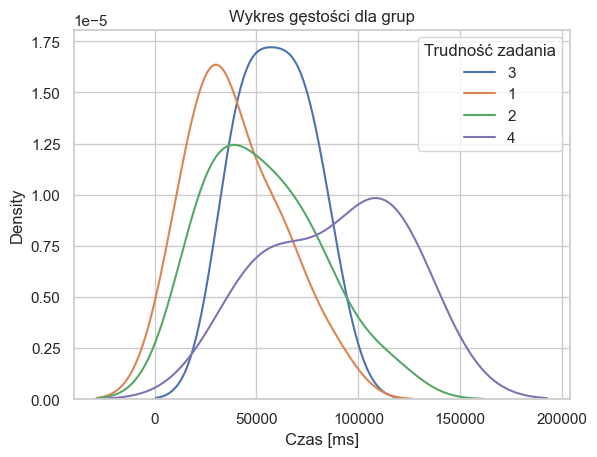

-------------------------------------
3a:


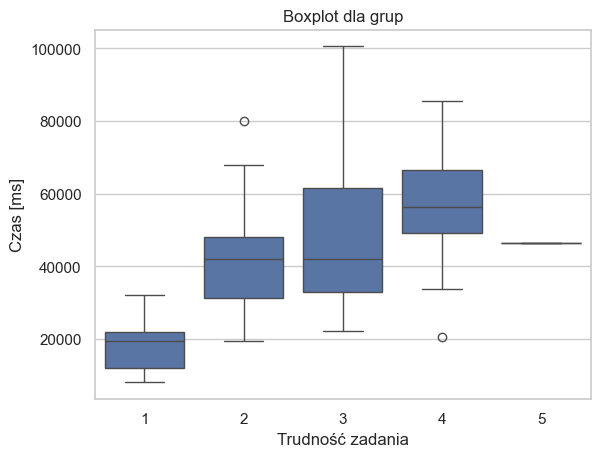

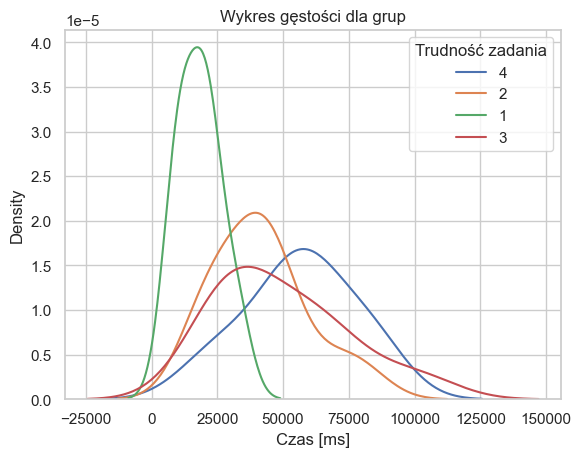

-------------------------------------
3b:


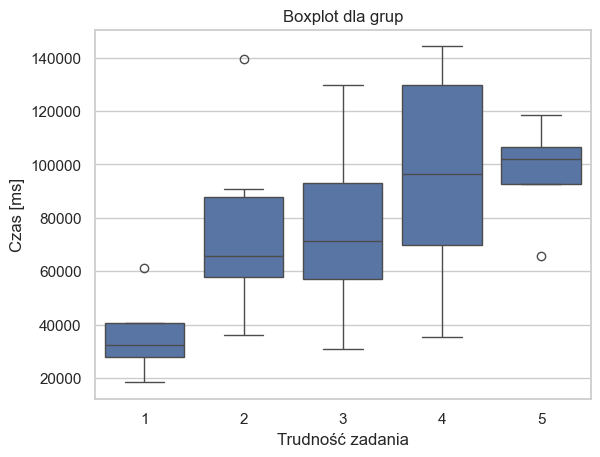

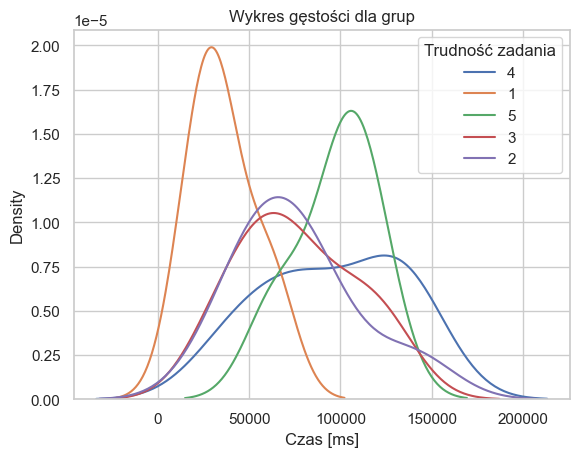

In [20]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    plot_multi_boxplot(df, 'difficulty', 'time', 'Trudność zadania', 'Czas [ms]', title='Boxplot dla grup')
    plot_multi_density(df, 'time', 'difficulty', 'Czas [ms]', 'Trudność zadania', title='Wykres gęstości dla grup')

### Podsumowanie:
Istnieje istotna statystycznie zależność między czasem odpowiedzi a trudnością zadania dla:
- zsumowane grafiki: 2, 3
- kolekcje grafik: wszystkich grafik, grafiki A, B, 1, 2, 3
- grafik 2a,2b,3a,3b


Ogólnie: czas odpowiedzi wzrastał wraz ze wzrostem oceny trudności (dla wszystkich analizowanych przypadków poza 1a i 1b ten wzrost był istotny statystycznie).
